# Gusset Plate Compresive Capacity  Prediction 

In [1]:
# Steps Involved : Data Exploration, Model Tuning, Model Performance Analysis, Inference with SHAP

# Data Exploration

In [1]:
# loading the libraries and dataset 
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv('D:\\1 Research Project\\Paper on Gueest Plate Buckling\\Code\\Gusset plate database.csv')
df.head()



,ID,Fy,t,L,C,Lc,S,Pu
0,1,248.0,6.35,203.0,72.0,102.0,76.0,305.59
1,2,248.0,6.35,232.0,77.0,102.0,76.0,312.71
2,3,248.0,6.35,203.0,74.0,102.0,76.0,317.60
3,C1-Free,505.0,6.70,275.0,147.0,375.0,135.0,441.70
4,C2-Free,240.0,3.11,275.0,147.0,375.0,135.0,122.40


In [2]:

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df= df[['Fy']+['t']+['L']+['C']+['Lc']+['S']+['Pu']]


df=df.round(decimals=6)

df.to_csv('test.csv')

df.head()



<ipython-input-2-cd88258e96dc>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Fy,t,L,C,Lc,S,Pu
0,248.0,6.35,203.0,72.0,102.0,76.0,305.59
1,248.0,6.35,232.0,77.0,102.0,76.0,312.71
2,248.0,6.35,203.0,74.0,102.0,76.0,317.60
3,505.0,6.70,275.0,147.0,375.0,135.0,441.70
4,240.0,3.11,275.0,147.0,375.0,135.0,122.40


In [3]:
# seperating the input parameter columns and prediction column
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(df.mean())

data=df
X = data.loc[:, data.columns != 'Pu']
y=data['Pu']
X.head()

,Fy,t,L,C,Lc,S
0,248.0,6.35,203.0,72.0,102.0,76.0
1,248.0,6.35,232.0,77.0,102.0,76.0
2,248.0,6.35,203.0,74.0,102.0,76.0
3,505.0,6.70,275.0,147.0,375.0,135.0
4,240.0,3.11,275.0,147.0,375.0,135.0


In [4]:
# checking the dataset if any string values exist
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fy      252 non-null    float64
 1   t       252 non-null    float64
 2   L       252 non-null    float64
 3   C       252 non-null    float64
 4   Lc      252 non-null    float64
 5   S       252 non-null    float64
 6   Pu      252 non-null    float64
dtypes: float64(7)
memory usage: 13.9 KB


In [5]:
# y axis shows the prediction column 
y.head()

0    305.59
1    312.71
2    317.60
3    441.70
4    122.40
Name: Pu, dtype: float64

In [6]:
# database size (Number of data, Number of input parameters)
print(data.shape)

(252, 7)


# Selection of Error analysis methods and Cross Validation Technique

In [7]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'RMSE(train)':[],
                           'R-squared (train)':[],
                           'Adj R-squared (train)':[],
                           'MAE (train)':[],
                           'RMSE (test)':[],
                           'R-squared (test)':[],
                           'Adj R-squared (test)':[],
                           'MAE(test)':[],
                           '10-Fold Cross Validation':[]})

evaluation2 = pd.DataFrame({'Model': [],
                           'Test':[],
                           '1':[],
                           '2':[],
                           '3':[],
                           '4':[],
                           '5':[],
                           '6':[],
                           '7':[],
                           '8':[],
                           '9':[],
                           '10':[],
                           'Mean':[]})
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

df= df[['Fy']+['t']+['L']+['C']+['Lc']+['S']+['Pu']]

features = list(data.columns.values)
print(features)
features=  ['Fy','t','L','C','Lc','S','Pu']
features2=   ['Fy','t','L','C','Lc','S']

# random spliting of train and test dataset 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


['Fy', 't', 'L', 'C', 'Lc', 'S', 'Pu']


In [8]:
# coverting the sample ID into float 
convert_dict = {'ID': float}

In [9]:
y = df["Pu"]
X = df.drop(["Pu"],axis=1)

X_scaled = pd.DataFrame(scaler.fit_transform(X),  index=X.index, columns=X.columns)

y = pd.DataFrame(df ['Pu'])
y_scaled=scaler.fit_transform(y)
y_scaled = pd.DataFrame(y_scaled,index=y.index, columns=y.columns )
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)


# Saving the train dataset and test dataset

In [45]:
df.iloc[X_train.index].to_csv("train_dataset.csv")

In [46]:
df.iloc[X_test.index].to_csv("test_dataset.csv")

# Model Training and Tuning 

## Linear Regression

In [47]:
print("For Linear Regression")
complex_model_1 = linear_model.LinearRegression(normalize=True)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['Linear Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['Linear Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['Linear Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['Linear Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['Linear Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['Linear Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['Linear Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['Linear Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['LR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

for linear Regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.93,0.821


## Ridge Regression

In [48]:
print("For Ridge Regression")
complex_model_1 = linear_model.Ridge(alpha=0.2, random_state=100, normalize=False, fit_intercept= bool)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['ridge Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ridge Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ridge Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ridge Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ridge Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ridge Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ridge Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ridge Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['RR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For ridge regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821


## Lasso Regression

In [49]:
print("For LASSO Regression")
complex_model_1 = linear_model.Lasso(alpha= 0.0001)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['LASSO Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['LASSO Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['LASSO Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['LASSO Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['LASSO Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['LASSO Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['LASSO Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['LASSO Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['Lasso','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821


## K- nearest Neighbors

In [50]:
print("For KNN Regression")
complex_model_1 = KNeighborsRegressor(n_neighbors=1, weights='distance', algorithm='auto')
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['kNN Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['kNN Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['kNN Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['kNN Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['kNN Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['kNN Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['kNN Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['kNN Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


r = evaluation.shape[0]
evaluation.loc[r] = ['KNN','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821


## Support Vector Regression

In [51]:
print("For SVR ")
from sklearn.svm import SVR
complex_model_1 = SVR( C=50, degree=1)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)

rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['SVR','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['SVR','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['SVR','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['SVR','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['SVR','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['SVR','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['SVR','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['SVR','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['SVR','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For SVR: 


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821
4,SVR,All features,543.461,0.656,0.646,304.591,666.456,0.522,0.457,344.287,0.606


## Decision Tree Regression

In [52]:
print("For Decision Tree regression")
from sklearn.tree import DecisionTreeRegressor
complex_model_1 = DecisionTreeRegressor(random_state=5000)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['DT','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['DT','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['DT','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['DT','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['DT','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['DT','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['DT','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['DT','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['DT','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Decision Tree regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
5,DT,All features,51.610,0.997,0.997,16.797,278.733,0.916,0.905,196.329,0.895
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821
4,SVR,All features,543.461,0.656,0.646,304.591,666.456,0.522,0.457,344.287,0.606


## Random Forest Regression

In [53]:
print("For Random Forest regression")
from sklearn.ensemble import RandomForestRegressor
complex_model_1 = RandomForestRegressor(random_state=2, n_estimators=1)
complex_model_1.fit(X_train, y_train)

pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['RF','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['RF','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['RF','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['RF','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['RF','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['RF','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['RF','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['RF','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]


r = evaluation.shape[0]
evaluation.loc[r] = ['RF','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Random Forest regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
5,DT,All features,51.610,0.997,0.997,16.797,278.733,0.916,0.905,196.329,0.895
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821
6,RF,All features,206.543,0.950,0.949,87.343,334.218,0.880,0.863,245.951,0.810
4,SVR,All features,543.461,0.656,0.646,304.591,666.456,0.522,0.457,344.287,0.606


For permutation feature importance for Random Forest

## Install XG Boost Regression

In [3]:
!pip install xgboost

## XG Boost Regression

In [10]:
print("For XGBoost regression")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import xgboost as xgb
from xgboost import plot_importance
complex_model_1 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=3)

complex_model_1.fit(X_train, y_train)
testing=pd.read_csv('D:\\1 Research Project\\Paper on Gueest Plate Buckling\\Code\\Gusset plate database.csv');
pred2=complex_model_1.predict(X_test)



pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()



r = evaluation2.shape[0]
evaluation2.loc[r] = ['XGBOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['XGBOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['XGBOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['XGBOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['XGBOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['XGBOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['XGBOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['XGBOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['XB','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For XGBoost regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
0,XB,All features,84.568,0.992,0.991,60.744,170.939,0.969,0.964,113.409,0.935


In [11]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('XgBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('XgBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('XgBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('XgBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

In [12]:
# Explore SHAP for feature importance and result analysis
import shap
complex_model_1_explainer = shap.KernelExplainer(complex_model_1.predict,X_train)
complex_model_1_shap_values = complex_model_1_explainer.shap_values(X_train)

Using 201 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/201 [00:00<?, ?it/s]

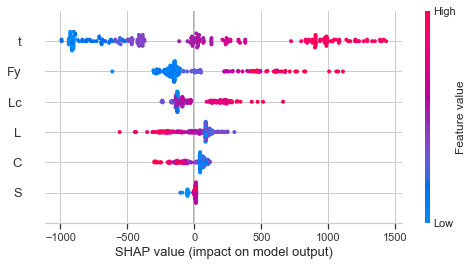

In [13]:
# SHAP summary_plot for Global interpretability explanation 
shap.summary_plot(complex_model_1_shap_values, X_train)

In [14]:
# SHAP summary_plot for Local interpretability explanation
shap.initjs()
shap.force_plot(complex_model_1_explainer.expected_value,complex_model_1_shap_values[0,:], X_test.iloc[0,:])

## ADABoost REGRESSION

In [60]:
from sklearn.ensemble import AdaBoostRegressor
print("For Adaboost regression")
complex_model_1 = AdaBoostRegressor(random_state=30, n_estimators=50)
complex_model_1.fit(X_train, y_train)


pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['ADABOOST Regression','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['ADABOOST Regression','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['ADABOOST Regression','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['ADABOOST Regression','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['ADABOOST Regression','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['ADABOOST Regression','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['ADABOOST Regression','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['ADABOOST Regression','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['AdaBoost','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

For Adaboost regression


,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
7,XB,All features,84.568,0.992,0.991,60.744,170.939,0.969,0.964,113.409,0.935
5,DT,All features,51.610,0.997,0.997,16.797,278.733,0.916,0.905,196.329,0.895
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
8,AdaBoost,All features,256.844,0.923,0.921,218.248,299.131,0.904,0.891,214.776,0.842
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821
6,RF,All features,206.543,0.950,0.949,87.343,334.218,0.880,0.863,245.951,0.810
4,SVR,All features,543.461,0.656,0.646,304.591,666.456,0.522,0.457,344.287,0.606


## Install CATBoost REGRESSION

In [61]:
print("For CatBoost regression")
!pip3 install catboost


For CatBoost regression


## CATBoost REGRESSION

In [62]:
from catboost import CatBoostRegressor,Pool
print("For CatBoost regression")
complex_model_1 = CatBoostRegressor(iterations=700,learning_rate=0.02,depth=5,eval_metric='RMSE',random_seed = 23,bagging_temperature = 0.2,od_type='Iter',
                             metric_period = 75,
                             od_wait=100)

complex_model_1.fit(X_train, y_train)
pred = complex_model_1.predict(X_test)
rmse_train = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_train), y_train)),'.3f'))
r2_train = float(format(complex_model_1.score(X_train, y_train),'.3f'))
ar2_train = float(format(adjustedR2(complex_model_1.score(X_train, y_train),X_train.shape[0],len(features)),'.3f'))
mae_train=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_train), y_train)),'.3f'))

rmse_test = float(format(np.sqrt(metrics.mean_squared_error(complex_model_1.predict(X_test), y_test)),'.3f'))
r2_test = float(format(complex_model_1.score(X_test, y_test),'.3f'))
ar2_test = float(format(adjustedR2(complex_model_1.score(X_test, y_test),X_test.shape[0],len(features)),'.3f'))
mae_test=float(format((metrics.mean_absolute_error(complex_model_1.predict(X_test), y_test)),'.3f'))

cv = float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10).mean(),'.3f'))

cv_train_rmse=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error')
cv_train_rmse_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_root_mean_squared_error').mean(),'.3f'))

cv_train_r2=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2')
cv_train_r2_m=float(format(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),'.3f'))

cv_train_ar2=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2'),X_train.shape[0],len(features))
cv_train_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='r2').mean(),X_train.shape[0],len(features))

cv_train_mae=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error')
cv_train_mae_m=cross_val_score(complex_model_1,X_train, y_train,cv=10,scoring='neg_mean_absolute_error').mean()

cv_test_rmse=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error')
cv_test_rmse_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_root_mean_squared_error').mean()

cv_test_r2=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2')
cv_test_r2_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean()

cv_test_ar2=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2'),X_test.shape[0],len(features))
cv_test_ar2_m=adjustedR2(cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='r2').mean(),X_test.shape[0],len(features))

cv_test_mae=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error')
cv_test_mae_m=cross_val_score(complex_model_1,X_test, y_test,cv=10,scoring='neg_mean_absolute_error').mean()


r = evaluation2.shape[0]
evaluation2.loc[r] = ['CATBOOST','Train RMSE',float(format(cv_train_rmse[0],'.3f')),float(format(cv_train_rmse[1],'.3f')),float(format(cv_train_rmse[2],'.3f')),float(format(cv_train_rmse[3],'.3f')),float(format(cv_train_rmse[4],'.3f')),float(format(cv_train_rmse[5],'.3f')),float(format(cv_train_rmse[6],'.3f')),float(format(cv_train_rmse[7],'.3f')),float(format(cv_train_rmse[8],'.3f')),float(format(cv_train_rmse[9],'.3f')),float(format(cv_train_rmse_m,'.3f'))]
evaluation2.loc[r+1] = ['CATBOOST','Train R2',float(format(cv_train_r2[0],'.3f')),float(format(cv_train_r2[1],'.3f')),float(format(cv_train_r2[2],'.3f')),float(format(cv_train_r2[3],'.3f')),float(format(cv_train_r2[4],'.3f')),float(format(cv_train_r2[5],'.3f')),float(format(cv_train_r2[6],'.3f')),float(format(cv_train_r2[7],'.3f')),float(format(cv_train_r2[8],'.3f')),float(format(cv_train_r2[9],'.3f')),float(format(cv_train_r2_m,'.3f'))]
evaluation2.loc[r+2] = ['CATBOOST','Train ar2',float(format(cv_train_ar2[0],'.3f')),float(format(cv_train_ar2[1],'.3f')),float(format(cv_train_ar2[2],'.3f')),float(format(cv_train_ar2[3],'.3f')),float(format(cv_train_ar2[4],'.3f')),float(format(cv_train_ar2[5],'.3f')),float(format(cv_train_ar2[6],'.3f')),float(format(cv_train_ar2[7],'.3f')),float(format(cv_train_ar2[8],'.3f')),float(format(cv_train_ar2[9],'.3f')),float(format(cv_train_ar2_m,'.3f'))]
evaluation2.loc[r+3] = ['CATBOOST','Train mae',float(format(cv_train_mae[0],'.3f')),float(format(cv_train_mae[1],'.3f')),float(format(cv_train_mae[2],'.3f')),float(format(cv_train_mae[3],'.3f')),float(format(cv_train_mae[4],'.3f')),float(format(cv_train_mae[5],'.3f')),float(format(cv_train_mae[6],'.3f')),float(format(cv_train_mae[7],'.3f')),float(format(cv_train_mae[8],'.3f')),float(format(cv_train_mae[9],'.3f')),float(format(cv_train_mae_m,'.3f'))]
evaluation2.loc[r+4] = ['CATBOOST','Test RMSE',float(format(cv_test_rmse[0],'.3f')),float(format(cv_test_rmse[1],'.3f')),float(format(cv_test_rmse[2],'.3f')),float(format(cv_test_rmse[3],'.3f')),float(format(cv_test_rmse[4],'.3f')),float(format(cv_test_rmse[5],'.3f')),float(format(cv_test_rmse[6],'.3f')),float(format(cv_test_rmse[7],'.3f')),float(format(cv_test_rmse[8],'.3f')),float(format(cv_test_rmse[9],'.3f')),float(format(cv_test_rmse_m,'.3f'))]
evaluation2.loc[r+5] = ['CATBOOST','Test R2',float(format(cv_test_r2[0],'.3f')),float(format(cv_test_r2[1],'.3f')),float(format(cv_test_r2[2],'.3f')),float(format(cv_test_r2[3],'.3f')),float(format(cv_test_r2[4],'.3f')),float(format(cv_test_r2[5],'.3f')),float(format(cv_test_r2[6],'.3f')),float(format(cv_test_r2[7],'.3f')),float(format(cv_test_r2[8],'.3f')),float(format(cv_test_r2[9],'.3f')),float(format(cv_test_r2_m,'.3f'))]
evaluation2.loc[r+6] = ['CATBOOST','Test ar2',float(format(cv_test_ar2[0],'.3f')),float(format(cv_test_ar2[1],'.3f')),float(format(cv_test_ar2[2],'.3f')),float(format(cv_test_ar2[3],'.3f')),float(format(cv_test_ar2[4],'.3f')),float(format(cv_test_ar2[5],'.3f')),float(format(cv_test_ar2[6],'.3f')),float(format(cv_test_ar2[7],'.3f')),float(format(cv_test_ar2[8],'.3f')),float(format(cv_test_ar2[9],'.3f')),float(format(cv_test_ar2_m,'.3f'))]
evaluation2.loc[r+7] = ['CATBOOST','Train mae',float(format(cv_test_mae[0],'.3f')),float(format(cv_test_mae[1],'.3f')),float(format(cv_test_mae[2],'.3f')),float(format(cv_test_mae[3],'.3f')),float(format(cv_test_mae[4],'.3f')),float(format(cv_test_mae[5],'.3f')),float(format(cv_test_mae[6],'.3f')),float(format(cv_test_mae[7],'.3f')),float(format(cv_test_mae[8],'.3f')),float(format(cv_test_mae[9],'.3f')),float(format(cv_test_mae_m,'.3f')) ]

r = evaluation.shape[0]
evaluation.loc[r] = ['CB','All features',rmse_train,r2_train,ar2_train,mae_train,rmse_test,r2_test,ar2_test,mae_test,cv]
evaluation.sort_values(by = '10-Fold Cross Validation', ascending=False)

0:	learn: 917.0005316	total: 29.2ms	remaining: 20.4s
75:	learn: 409.2308910	total: 69.9ms	remaining: 574ms
150:	learn: 238.6525814	total: 114ms	remaining: 416ms
225:	learn: 173.7658636	total: 162ms	remaining: 340ms
300:	learn: 140.9759416	total: 213ms	remaining: 282ms
375:	learn: 123.9279698	total: 251ms	remaining: 217ms
450:	learn: 111.8763862	total: 292ms	remaining: 161ms
525:	learn: 103.3910356	total: 337ms	remaining: 112ms
600:	learn: 95.3567035	total: 374ms	remaining: 61.7ms
675:	learn: 88.7879680	total: 408ms	remaining: 14.5ms
699:	learn: 86.7880794	total: 419ms	remaining: 0us
0:	learn: 933.0011819	total: 24.9ms	remaining: 17.4s
75:	learn: 419.5528783	total: 57.5ms	remaining: 472ms
150:	learn: 242.6973429	total: 89.5ms	remaining: 325ms
225:	learn: 173.6027313	total: 121ms	remaining: 254ms
300:	learn: 141.7618768	total: 152ms	remaining: 202ms
375:	learn: 124.6707510	total: 184ms	remaining: 159ms
450:	learn: 112.5701131	total: 215ms	remaining: 119ms
525:	learn: 102.4412282	total: 2

0:	learn: 920.1325640	total: 16.8ms	remaining: 11.7s
75:	learn: 415.1790542	total: 49.9ms	remaining: 410ms
150:	learn: 244.0292305	total: 82.1ms	remaining: 298ms
225:	learn: 176.2510302	total: 114ms	remaining: 239ms
300:	learn: 144.1707867	total: 147ms	remaining: 195ms
375:	learn: 124.4326051	total: 178ms	remaining: 153ms
450:	learn: 113.6688298	total: 210ms	remaining: 116ms
525:	learn: 103.5620086	total: 241ms	remaining: 79.7ms
600:	learn: 96.4332511	total: 274ms	remaining: 45.2ms
675:	learn: 90.7007141	total: 306ms	remaining: 10.9ms
699:	learn: 88.6829631	total: 316ms	remaining: 0us
0:	learn: 902.4371790	total: 12.3ms	remaining: 8.56s
75:	learn: 401.3268559	total: 46.5ms	remaining: 382ms
150:	learn: 231.3149216	total: 79.1ms	remaining: 287ms
225:	learn: 164.1401887	total: 110ms	remaining: 232ms
300:	learn: 132.9525117	total: 142ms	remaining: 188ms
375:	learn: 118.8332170	total: 173ms	remaining: 149ms
450:	learn: 106.0922325	total: 206ms	remaining: 114ms
525:	learn: 96.7553291	total: 

0:	learn: 898.1881232	total: 23.5ms	remaining: 16.4s
75:	learn: 412.8613161	total: 56.2ms	remaining: 461ms
150:	learn: 244.7718946	total: 88.4ms	remaining: 321ms
225:	learn: 176.9137485	total: 121ms	remaining: 254ms
300:	learn: 143.3416588	total: 155ms	remaining: 206ms
375:	learn: 125.2130569	total: 187ms	remaining: 161ms
450:	learn: 112.2518402	total: 221ms	remaining: 122ms
525:	learn: 102.7013402	total: 254ms	remaining: 84.1ms
600:	learn: 94.7916727	total: 287ms	remaining: 47.2ms
675:	learn: 88.7907067	total: 320ms	remaining: 11.3ms
699:	learn: 87.2595399	total: 330ms	remaining: 0us
0:	learn: 941.8622223	total: 13.9ms	remaining: 9.71s
75:	learn: 417.6734236	total: 47.7ms	remaining: 392ms
150:	learn: 242.6065286	total: 80.3ms	remaining: 292ms
225:	learn: 176.6442023	total: 114ms	remaining: 239ms
300:	learn: 142.4422157	total: 146ms	remaining: 194ms
375:	learn: 122.3667925	total: 178ms	remaining: 153ms
450:	learn: 112.0202999	total: 211ms	remaining: 116ms
525:	learn: 102.6044477	total:

0:	learn: 913.7580874	total: 17.1ms	remaining: 11.9s
75:	learn: 412.3097315	total: 47.9ms	remaining: 393ms
150:	learn: 239.1258287	total: 81.2ms	remaining: 295ms
225:	learn: 168.8717902	total: 113ms	remaining: 238ms
300:	learn: 137.1529543	total: 144ms	remaining: 191ms
375:	learn: 119.1915367	total: 175ms	remaining: 151ms
450:	learn: 107.7220765	total: 206ms	remaining: 114ms
525:	learn: 101.0011645	total: 238ms	remaining: 78.6ms
600:	learn: 95.4999553	total: 269ms	remaining: 44.3ms
675:	learn: 89.6392974	total: 302ms	remaining: 10.7ms
699:	learn: 87.6945822	total: 313ms	remaining: 0us
0:	learn: 933.4883891	total: 6.8ms	remaining: 4.75s
75:	learn: 417.0211666	total: 54.6ms	remaining: 448ms
150:	learn: 242.3956834	total: 90.2ms	remaining: 328ms
225:	learn: 174.9091159	total: 123ms	remaining: 258ms
300:	learn: 141.8850474	total: 155ms	remaining: 205ms
375:	learn: 124.1123730	total: 187ms	remaining: 161ms
450:	learn: 110.5892557	total: 220ms	remaining: 121ms
525:	learn: 103.5006716	total: 

0:	learn: 895.5614728	total: 864us	remaining: 605ms
75:	learn: 413.9640861	total: 33.6ms	remaining: 276ms
150:	learn: 245.8444935	total: 64.9ms	remaining: 236ms
225:	learn: 174.8010138	total: 96ms	remaining: 201ms
300:	learn: 139.3911639	total: 127ms	remaining: 168ms
375:	learn: 118.5578393	total: 158ms	remaining: 136ms
450:	learn: 106.7201695	total: 189ms	remaining: 104ms
525:	learn: 95.3379452	total: 220ms	remaining: 72.7ms
600:	learn: 87.8698536	total: 252ms	remaining: 41.4ms
675:	learn: 81.6303362	total: 283ms	remaining: 10.1ms
699:	learn: 80.0701939	total: 293ms	remaining: 0us
0:	learn: 894.4661546	total: 10.2ms	remaining: 7.11s
75:	learn: 409.2020601	total: 42.9ms	remaining: 352ms
150:	learn: 245.9717095	total: 73.6ms	remaining: 267ms
225:	learn: 182.0464686	total: 105ms	remaining: 220ms
300:	learn: 149.5582018	total: 136ms	remaining: 180ms
375:	learn: 129.5381156	total: 166ms	remaining: 143ms
450:	learn: 116.8326359	total: 197ms	remaining: 109ms
525:	learn: 106.0289984	total: 22

0:	learn: 927.7443157	total: 3.16ms	remaining: 2.21s
75:	learn: 418.0237561	total: 34.2ms	remaining: 281ms
150:	learn: 243.8550320	total: 65.6ms	remaining: 238ms
225:	learn: 173.9778030	total: 96.9ms	remaining: 203ms
300:	learn: 140.6459690	total: 128ms	remaining: 169ms
375:	learn: 122.2339859	total: 159ms	remaining: 137ms
450:	learn: 108.6027984	total: 190ms	remaining: 105ms
525:	learn: 98.4628476	total: 222ms	remaining: 73.4ms
600:	learn: 90.3846789	total: 265ms	remaining: 43.7ms
675:	learn: 83.9004632	total: 296ms	remaining: 10.5ms
699:	learn: 82.0806174	total: 306ms	remaining: 0us
0:	learn: 933.0011819	total: 13.2ms	remaining: 9.23s
75:	learn: 419.5528783	total: 48.5ms	remaining: 398ms
150:	learn: 242.6973429	total: 82.3ms	remaining: 299ms
225:	learn: 173.6027313	total: 114ms	remaining: 239ms
300:	learn: 141.7618768	total: 144ms	remaining: 191ms
375:	learn: 124.6707510	total: 176ms	remaining: 152ms
450:	learn: 112.5701131	total: 208ms	remaining: 115ms
525:	learn: 102.4412282	total:

0:	learn: 920.1325640	total: 16.3ms	remaining: 11.4s
75:	learn: 415.1790542	total: 49ms	remaining: 402ms
150:	learn: 244.0292305	total: 81ms	remaining: 295ms
225:	learn: 176.2510302	total: 113ms	remaining: 237ms
300:	learn: 144.1707867	total: 145ms	remaining: 193ms
375:	learn: 124.4326051	total: 179ms	remaining: 154ms
450:	learn: 113.6688298	total: 210ms	remaining: 116ms
525:	learn: 103.5620086	total: 244ms	remaining: 80.7ms
600:	learn: 96.4332511	total: 276ms	remaining: 45.5ms
675:	learn: 90.7007141	total: 308ms	remaining: 10.9ms
699:	learn: 88.6829631	total: 318ms	remaining: 0us
0:	learn: 902.4371790	total: 876us	remaining: 613ms
75:	learn: 401.3268559	total: 37.9ms	remaining: 311ms
150:	learn: 231.3149216	total: 69.2ms	remaining: 252ms
225:	learn: 164.1401887	total: 100ms	remaining: 211ms
300:	learn: 132.9525117	total: 132ms	remaining: 175ms
375:	learn: 118.8332170	total: 164ms	remaining: 142ms
450:	learn: 106.0922325	total: 196ms	remaining: 108ms
525:	learn: 96.7553291	total: 227ms

0:	learn: 986.2744219	total: 23.3ms	remaining: 16.3s
75:	learn: 548.6741452	total: 50.9ms	remaining: 418ms
150:	learn: 343.9238301	total: 77.2ms	remaining: 281ms
225:	learn: 234.2114579	total: 104ms	remaining: 218ms
300:	learn: 166.8181213	total: 133ms	remaining: 176ms
375:	learn: 112.4814503	total: 161ms	remaining: 139ms
450:	learn: 79.8327970	total: 187ms	remaining: 103ms
525:	learn: 58.9576712	total: 214ms	remaining: 70.7ms
600:	learn: 44.9467710	total: 240ms	remaining: 39.6ms
675:	learn: 35.8898488	total: 266ms	remaining: 9.46ms
699:	learn: 33.4257003	total: 275ms	remaining: 0us
0:	learn: 826.9268334	total: 10.2ms	remaining: 7.13s
75:	learn: 465.8295121	total: 38ms	remaining: 312ms
150:	learn: 287.8646054	total: 64ms	remaining: 233ms
225:	learn: 191.4486033	total: 90.3ms	remaining: 189ms
300:	learn: 128.8175770	total: 117ms	remaining: 155ms
375:	learn: 88.1804537	total: 143ms	remaining: 123ms
450:	learn: 62.4764751	total: 170ms	remaining: 93.6ms
525:	learn: 47.3715301	total: 196ms	

0:	learn: 972.9122298	total: 716us	remaining: 501ms
75:	learn: 540.8412304	total: 30.7ms	remaining: 252ms
150:	learn: 335.9651927	total: 56.4ms	remaining: 205ms
225:	learn: 227.6223225	total: 82.2ms	remaining: 172ms
300:	learn: 163.5614374	total: 123ms	remaining: 163ms
375:	learn: 112.7689442	total: 149ms	remaining: 129ms
450:	learn: 82.2643748	total: 175ms	remaining: 96.9ms
525:	learn: 63.2681750	total: 204ms	remaining: 67.4ms
600:	learn: 47.0462344	total: 231ms	remaining: 38ms
675:	learn: 37.0109002	total: 257ms	remaining: 9.11ms
699:	learn: 33.8499115	total: 265ms	remaining: 0us
0:	learn: 981.4990934	total: 13.2ms	remaining: 9.21s
75:	learn: 560.1086329	total: 40.8ms	remaining: 335ms
150:	learn: 344.7800279	total: 67.2ms	remaining: 244ms
225:	learn: 234.9412411	total: 93.2ms	remaining: 195ms
300:	learn: 168.9334647	total: 119ms	remaining: 158ms
375:	learn: 120.9498737	total: 146ms	remaining: 126ms
450:	learn: 85.7459971	total: 172ms	remaining: 95.1ms
525:	learn: 63.1398146	total: 19

0:	learn: 923.4955221	total: 13.2ms	remaining: 9.2s
75:	learn: 533.7515824	total: 45.1ms	remaining: 370ms
150:	learn: 349.6078516	total: 71.7ms	remaining: 261ms
225:	learn: 246.3558717	total: 96.8ms	remaining: 203ms
300:	learn: 178.5840371	total: 123ms	remaining: 163ms
375:	learn: 128.7144535	total: 149ms	remaining: 128ms
450:	learn: 87.2692121	total: 175ms	remaining: 96.7ms
525:	learn: 61.7771554	total: 201ms	remaining: 66.5ms
600:	learn: 43.7205053	total: 230ms	remaining: 37.9ms
675:	learn: 31.7726099	total: 259ms	remaining: 9.19ms
699:	learn: 28.6729614	total: 268ms	remaining: 0us
0:	learn: 947.6728531	total: 631us	remaining: 442ms
75:	learn: 546.6832787	total: 36ms	remaining: 296ms
150:	learn: 344.4965507	total: 67.9ms	remaining: 247ms
225:	learn: 232.9139735	total: 95.6ms	remaining: 200ms
300:	learn: 172.3351736	total: 122ms	remaining: 162ms
375:	learn: 125.2363579	total: 148ms	remaining: 128ms
450:	learn: 87.6438380	total: 175ms	remaining: 96.4ms
525:	learn: 63.3038899	total: 206

0:	learn: 1003.8753991	total: 5.08ms	remaining: 3.55s
75:	learn: 557.2983376	total: 35.6ms	remaining: 292ms
150:	learn: 341.6566833	total: 61.9ms	remaining: 225ms
225:	learn: 231.3240594	total: 87.5ms	remaining: 184ms
300:	learn: 164.6880085	total: 114ms	remaining: 152ms
375:	learn: 116.5248357	total: 142ms	remaining: 122ms
450:	learn: 83.7223299	total: 169ms	remaining: 93.2ms
525:	learn: 62.8248472	total: 198ms	remaining: 65.6ms
600:	learn: 48.9992820	total: 225ms	remaining: 37ms
675:	learn: 39.4299833	total: 251ms	remaining: 8.91ms
699:	learn: 36.5271029	total: 259ms	remaining: 0us
0:	learn: 947.7502060	total: 569us	remaining: 398ms
75:	learn: 553.2761650	total: 26.7ms	remaining: 219ms
150:	learn: 346.2825088	total: 52.9ms	remaining: 192ms
225:	learn: 235.6671428	total: 80.2ms	remaining: 168ms
300:	learn: 167.7367966	total: 107ms	remaining: 142ms
375:	learn: 120.3634688	total: 134ms	remaining: 116ms
450:	learn: 91.6669132	total: 161ms	remaining: 89.1ms
525:	learn: 70.7243366	total: 1

0:	learn: 972.2827659	total: 3.47ms	remaining: 2.42s
75:	learn: 542.0954827	total: 32.9ms	remaining: 270ms
150:	learn: 341.0260410	total: 62.2ms	remaining: 226ms
225:	learn: 233.6232873	total: 89.7ms	remaining: 188ms
300:	learn: 168.9756899	total: 118ms	remaining: 156ms
375:	learn: 118.8051145	total: 146ms	remaining: 126ms
450:	learn: 85.7375294	total: 172ms	remaining: 95.1ms
525:	learn: 63.5094186	total: 201ms	remaining: 66.4ms
600:	learn: 47.4859884	total: 228ms	remaining: 37.5ms
675:	learn: 37.4892165	total: 255ms	remaining: 9.04ms
699:	learn: 34.9208067	total: 264ms	remaining: 0us
0:	learn: 983.7093093	total: 24.8ms	remaining: 17.3s
75:	learn: 554.8750845	total: 52.3ms	remaining: 429ms
150:	learn: 343.1078401	total: 79.1ms	remaining: 288ms
225:	learn: 229.7483590	total: 107ms	remaining: 224ms
300:	learn: 164.4794585	total: 135ms	remaining: 179ms
375:	learn: 118.7619813	total: 163ms	remaining: 140ms
450:	learn: 84.7443679	total: 191ms	remaining: 105ms
525:	learn: 63.9740594	total: 2

0:	learn: 986.2744219	total: 2.53ms	remaining: 1.77s
75:	learn: 548.6741452	total: 30.5ms	remaining: 251ms
150:	learn: 343.9238301	total: 56.5ms	remaining: 206ms
225:	learn: 234.2114579	total: 81.7ms	remaining: 171ms
300:	learn: 166.8181213	total: 107ms	remaining: 142ms
375:	learn: 112.4814503	total: 134ms	remaining: 115ms
450:	learn: 79.8327970	total: 159ms	remaining: 87.7ms
525:	learn: 58.9576712	total: 185ms	remaining: 61.1ms
600:	learn: 44.9467710	total: 211ms	remaining: 34.7ms
675:	learn: 35.8898488	total: 236ms	remaining: 8.39ms
699:	learn: 33.4257003	total: 245ms	remaining: 0us
0:	learn: 826.9268334	total: 24.6ms	remaining: 17.2s
75:	learn: 465.8295121	total: 53.5ms	remaining: 439ms
150:	learn: 287.8646054	total: 81ms	remaining: 294ms
225:	learn: 191.4486033	total: 107ms	remaining: 224ms
300:	learn: 128.8175770	total: 133ms	remaining: 176ms
375:	learn: 88.1804537	total: 159ms	remaining: 137ms
450:	learn: 62.4764751	total: 186ms	remaining: 102ms
525:	learn: 47.3715301	total: 212m

,Model,Details,RMSE(train),R-squared (train),Adj R-squared (train),MAE (train),RMSE (test),R-squared (test),Adj R-squared (test),MAE(test),10-Fold Cross Validation
9,CB,All features,86.788,0.991,0.991,63.036,184.882,0.963,0.958,125.723,0.940
7,XB,All features,84.568,0.992,0.991,60.744,170.939,0.969,0.964,113.409,0.935
5,DT,All features,51.610,0.997,0.997,16.797,278.733,0.916,0.905,196.329,0.895
3,KNN,All features,68.725,0.995,0.994,17.158,222.075,0.947,0.940,171.824,0.865
8,AdaBoost,All features,256.844,0.923,0.921,218.248,299.131,0.904,0.891,214.776,0.842
1,RR,All features,350.484,0.857,0.853,256.370,389.973,0.836,0.814,228.597,0.823
0,LR,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.930,0.821
2,Lasso,All features,349.815,0.858,0.853,257.345,386.947,0.839,0.817,231.929,0.821
6,RF,All features,206.543,0.950,0.949,87.343,334.218,0.880,0.863,245.951,0.810
4,SVR,All features,543.461,0.656,0.646,304.591,666.456,0.522,0.457,344.287,0.606


In [63]:
# Print the predicted and actual value for the test set
MLR_y_test_prediction= complex_model_1.predict(X_test)
np.savetxt('CatBOOST_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_test_actual.csv', y_test, delimiter=',', fmt='%s')

# Print the predicted and actual value for the traing set
MLR_y_train_prediction= complex_model_1.predict(X_train)
np.savetxt('CatBOOST_train_prediction.csv', MLR_y_train_prediction, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_train_actual.csv', y_train, delimiter=',', fmt='%s')

X_standardized = scaler.transform(X)
MLR_y_pred_entire_data = complex_model_1.predict(X_standardized)
np.savetxt('CatBOOST_entire_prediction.csv', MLR_y_pred_entire_data, delimiter=',', fmt='%s')
np.savetxt('CatBOOST_entire_actual.csv', y, delimiter=',', fmt='%s')

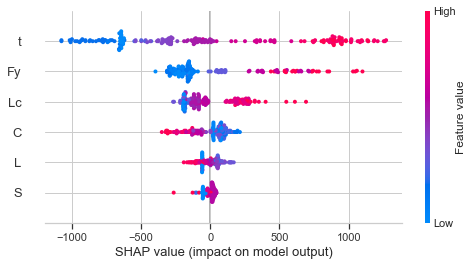

In [64]:
# Explore SHAP for feature importance and result analysis
# SHAP summary_plot for Global interpretability explanation
import shap
shap_values = complex_model_1.get_feature_importance(Pool(X_train, label=y_train) , type="ShapValues")
 
expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train)

In [65]:
complex_model_1_explainer = shap.KernelExplainer(complex_model_1.predict,X_train)
complex_model_1_shap_values = complex_model_1_explainer.shap_values(X_train)

Using 201 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/201 [00:00<?, ?it/s]

In [66]:
# SHAP summary_plot for Local interpretability explanation
shap.force_plot(complex_model_1_explainer.expected_value,complex_model_1_shap_values[0,:], X_train.iloc[0,:])

## Saving the model performance results

In [68]:
evaluation.to_csv("model_performance_results.csv")
evaluation2.to_csv("model_cross_val_results.csv")

## After evaluating the model performances, CATBoost has the heighest prediction accuracy.